# Explore here

In [1]:
!pip install seaborn
!pip install scikit-learn
!pip install statsmodels
!pip install missingno
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import KFold
import joblib
import math
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

In [ ]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=";")

In [ ]:
df.head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mont

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())
    print("\n")

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64


contact
cellular     26144
telephone    15044
Name: coun

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df['contactado_previamente'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)
df.drop('pdays', axis=1, inplace=True)

In [ ]:
# Identificar la cantidad de valores 'unknown' en cada columna categórica
for column in df.select_dtypes(include=['object']).columns:
    unknowns = (df[column] == 'unknown').sum()
    if unknowns > 0:
        print(f"{column}: {unknowns} 'unknown' values")

job: 330 'unknown' values
marital: 80 'unknown' values
education: 1731 'unknown' values
default: 8597 'unknown' values
housing: 990 'unknown' values
loan: 990 'unknown' values


In [ ]:
df.head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mont

In [ ]:
# Eliminar datos faltantes de 'job' y 'marital' (representan un porcentaje pequeño del total de la muestra)
df = df[~((df['job'] == 'unknown') | (df['marital'] == 'unknown'))]

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,40787.0,39.978817,10.402157,17.000,32.000,38.000,47.000,98.000
duration,40787.0,258.329811,259.269596,0.000,102.000,180.000,319.500,4918.000
campaign,40787.0,2.566112,2.768103,1.000,1.000,2.000,3.000,56.000
previous,40787.0,0.172874,0.494863,0.000,0.000,0.000,0.000,7.000
emp.var.rate,40787.0,0.080516,1.570133,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,40787.0,93.574804,0.578558,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,40787.0,-40.515770,4.626805,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,40787.0,3.619532,1.734416,0.634,1.344,4.857,4.961,5.045
nr.employed,40787.0,5167.017866,72.231843,4963.600,5099.100,5191.000,5228.100,5228.100
contactado_previamente,40787.0,0.036531,0.187610,0.000,0.000,0.000,0.000,1.000


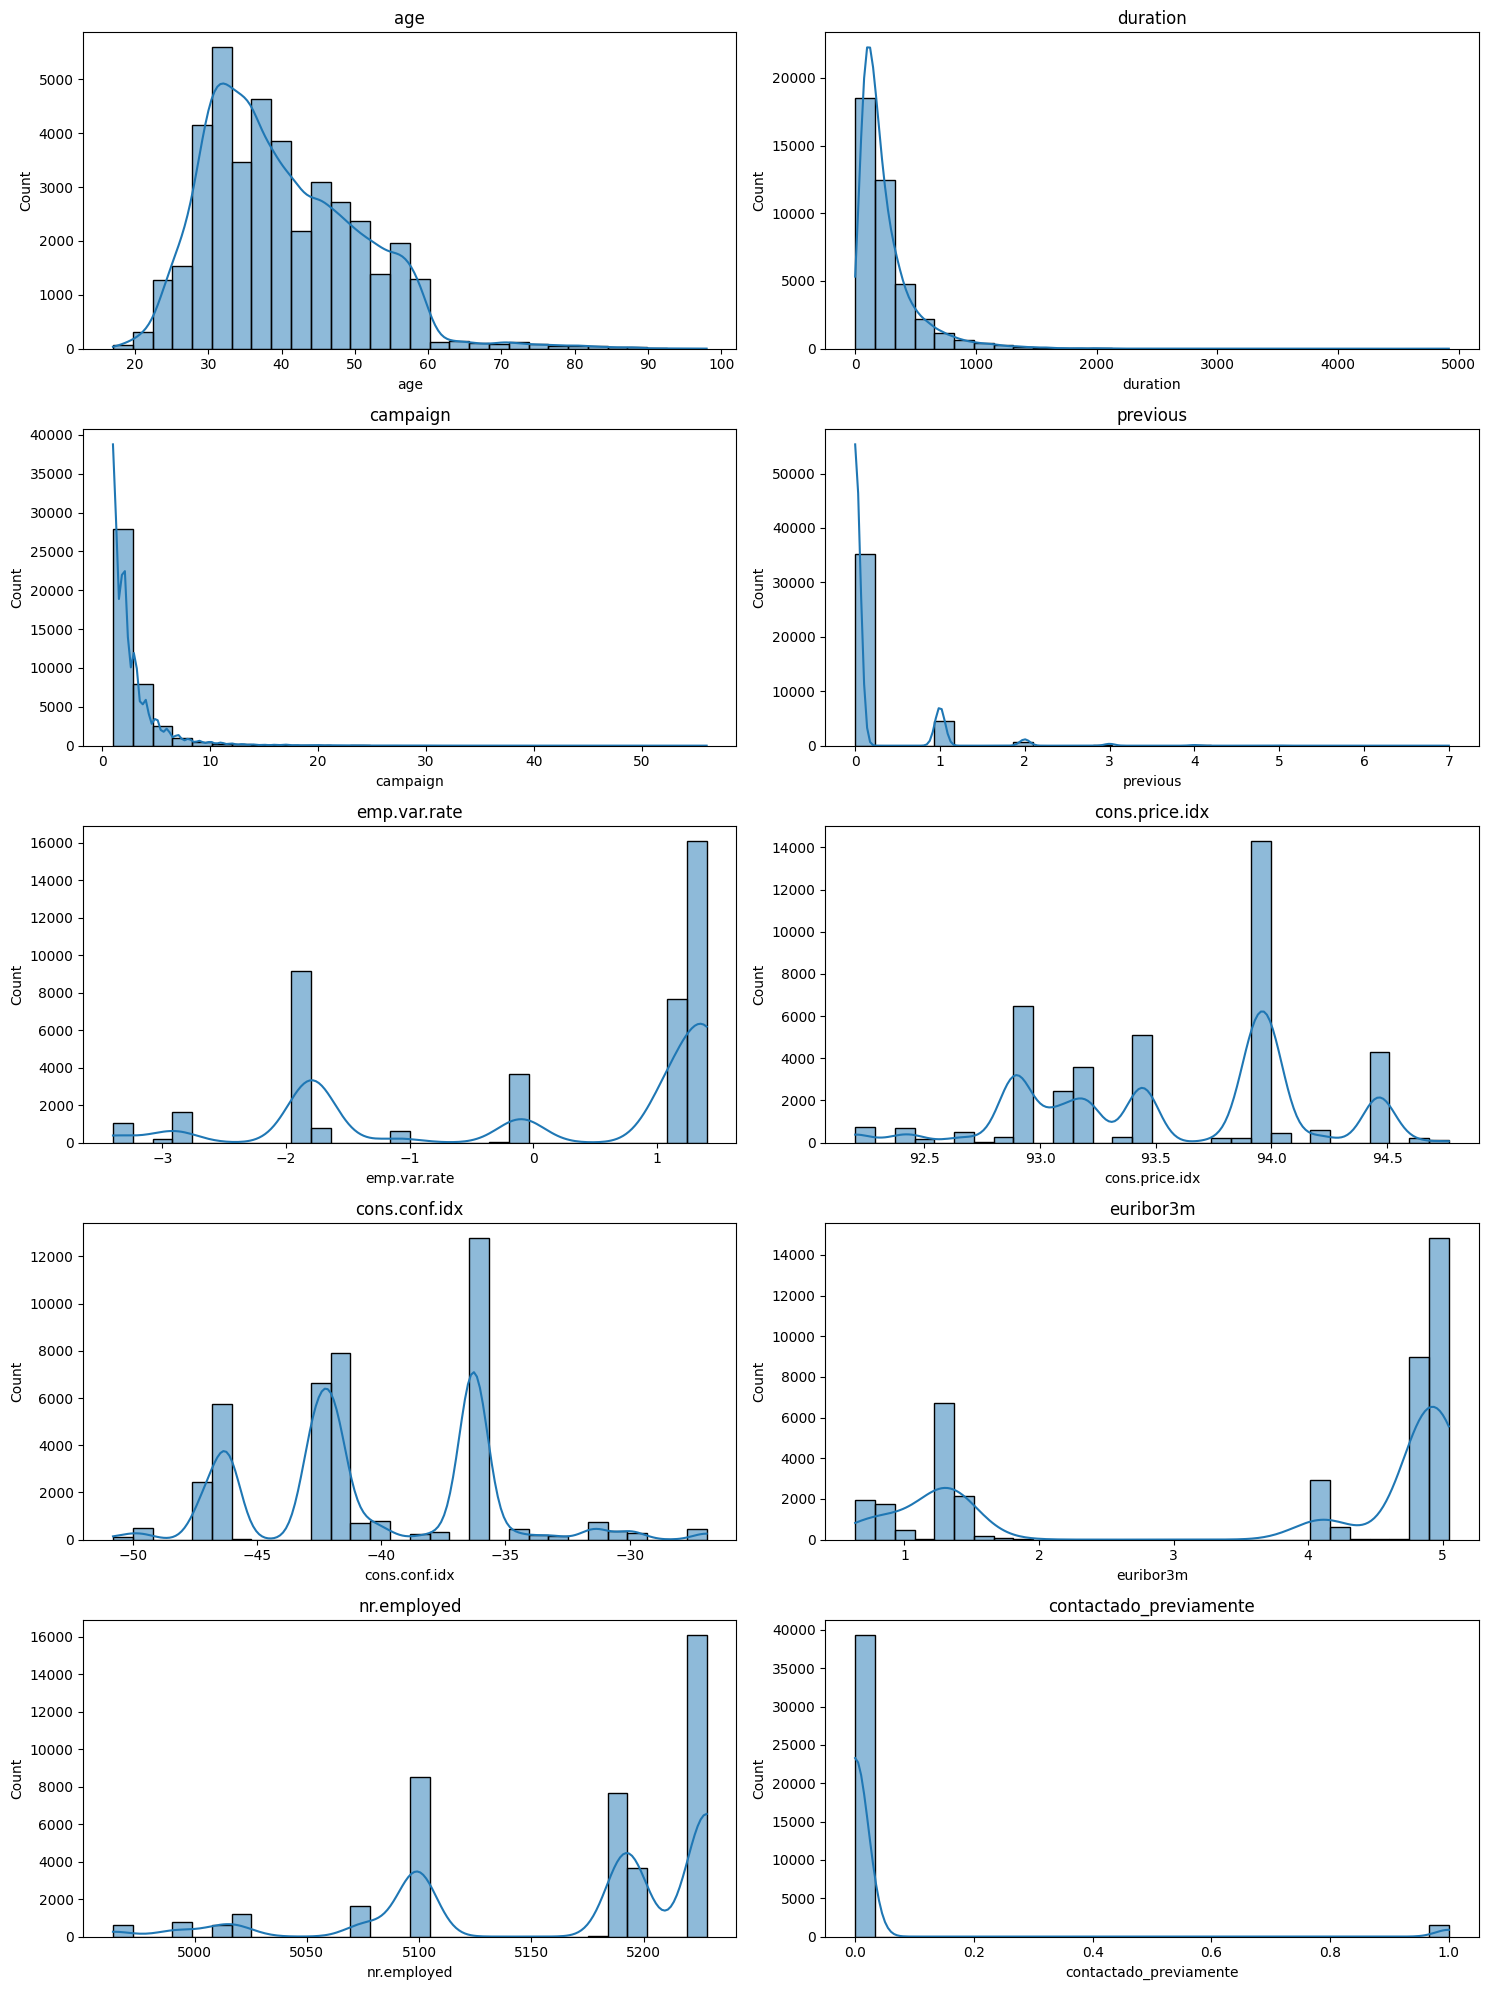

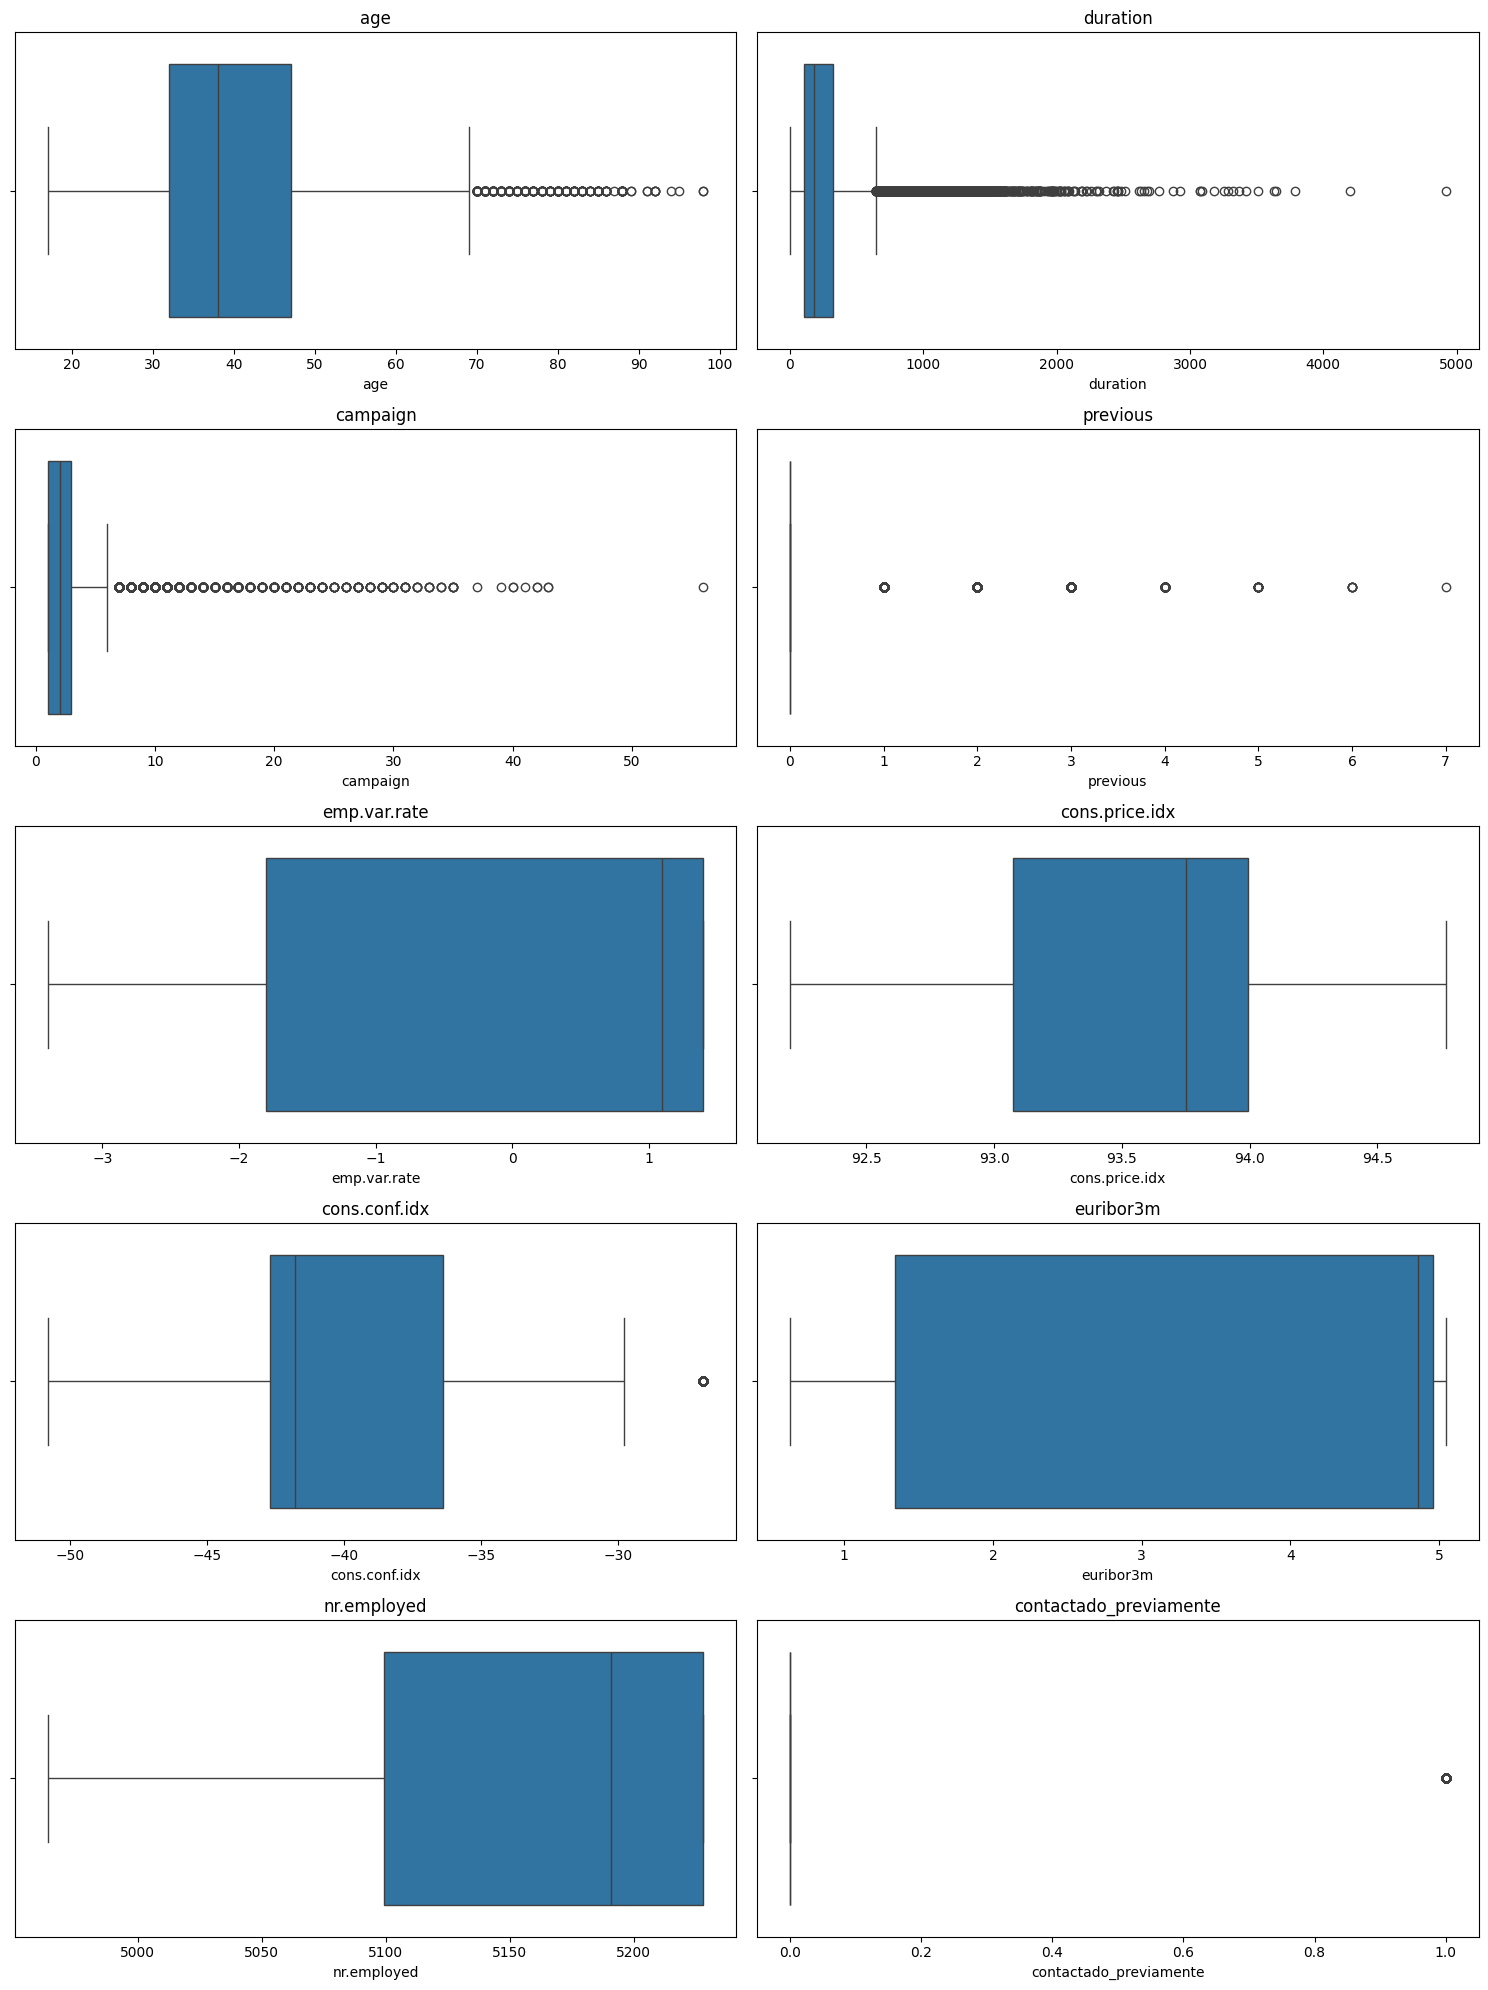

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
n = len(num_cols)
rows = math.ceil(n / 2)

plt.figure(figsize=(15, 4 * rows))

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()

# Para Boxplots
plt.figure(figsize=(15, 4 * rows))

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, 2, i)
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()

# ANÁLISIS
## HISTOGRAMAS
### 
Edad (age): La distribución de la edad parece ser ligeramente sesgada hacia la derecha, indicando una población más joven. Hay una concentración alta de clientes en la franja de 30 a 40 años.

Duración (duration): Esta variable muestra una gran cantidad de llamadas cortas y algunas muy largas, lo que produce una distribución con cola a la derecha. Esto es típico en datos de duración de llamadas.

Campaña (campaign): La mayoría de los clientes han sido contactados por la campaña 1-3 veces. Hay casos extremos donde el contacto ha sido mucho más frecuente, pero son raros.

Previos (previous): La mayoría de los clientes no han sido contactados antes de la campaña actual, lo que se muestra por el pico en 0.

Tasa de Variación del Empleo (emp.var.rate): Hay picos claros en valores específicos, lo que sugiere que hay periodos de tiempo en los que la tasa de variación del empleo es constante.

Índice de Precios al Consumidor (cons.price.idx): Similar a la tasa de variación del empleo, hay picos en valores específicos, posiblemente indicando periodos estables o cambios en el índice en momentos particulares.

Índice de Confianza del Consumidor (cons.conf.idx): Los datos muestran picos en ciertos valores, lo cual puede ser una característica de cómo se calcula o reporta este índice.

Euribor 3 Meses (euribor3m): La distribución tiene múltiples picos y también es sesgada a la derecha. Los picos pueden estar relacionados con cambios estándar en la tasa de Euribor.

Número de Empleados (nr.employed): Esta variable muestra picos significativos en ciertos valores, lo que puede ser indicativo de cambios en el número de empleados en momentos específicos.

Contactado Previamente (contactado_previamente): La gran mayoría de los clientes no ha sido contactada previamente, como lo demuestra el pico en 0.

## BOXPLOTS
###
Edad (age): La mayoría de los clientes se encuentran en el rango intercuartílico de aproximadamente 30 a 50 años. Hay algunos valores atípicos, lo que indica la presencia de clientes significativamente más jóvenes o más viejos que la mayoría.

Duración (duration): Esta variable muestra una gran cantidad de valores atípicos, lo que sugiere que algunas llamadas fueron mucho más largas de lo común. Esto podría deberse a conversaciones extensas con algunos clientes o llamadas que no se terminaron correctamente.

Campaña (campaign): Hay muchos valores atípicos que muestran que algunos clientes fueron contactados muchas más veces de lo normal durante la campaña. Esto podría indicar un esfuerzo más intensivo para ciertos clientes o una estrategia de seguimiento específica.

Previos (previous): Similar a campaign, la mayoría de los clientes no tienen contactos previos, pero hay valores atípicos que podrían ser de interés para entender la efectividad de las campañas anteriores.

Tasa de Variación del Empleo (emp.var.rate): La distribución de esta variable está muy centrada alrededor de ciertos valores, con pocos valores atípicos.

Índice de Precios al Consumidor (cons.price.idx): Tiene una distribución muy concentrada alrededor de unos pocos valores con pocos valores atípicos, lo que sugiere que los datos corresponden a períodos de tiempo específicos con índices establecidos.

Índice de Confianza del Consumidor (cons.conf.idx): Al igual que cons.price.idx, esta variable está centrada en torno a ciertos valores con pocos valores atípicos.

Euribor 3 Meses (euribor3m): Esta variable tiene una distribución concentrada, lo cual es consistente con la estabilidad en las tasas de interés durante ciertos períodos de tiempo.

Número de Empleados (nr.employed): La distribución se centra alrededor de ciertos valores con algunos atípicos, lo que podría reflejar cambios en el número total de empleados a lo largo del tiempo.

Contactado Previamente (contactado_previamente): Esta variable binaria muestra que la gran mayoría de los clientes no ha sido contactada previamente, con una proporción muy pequeña que sí lo ha sido.

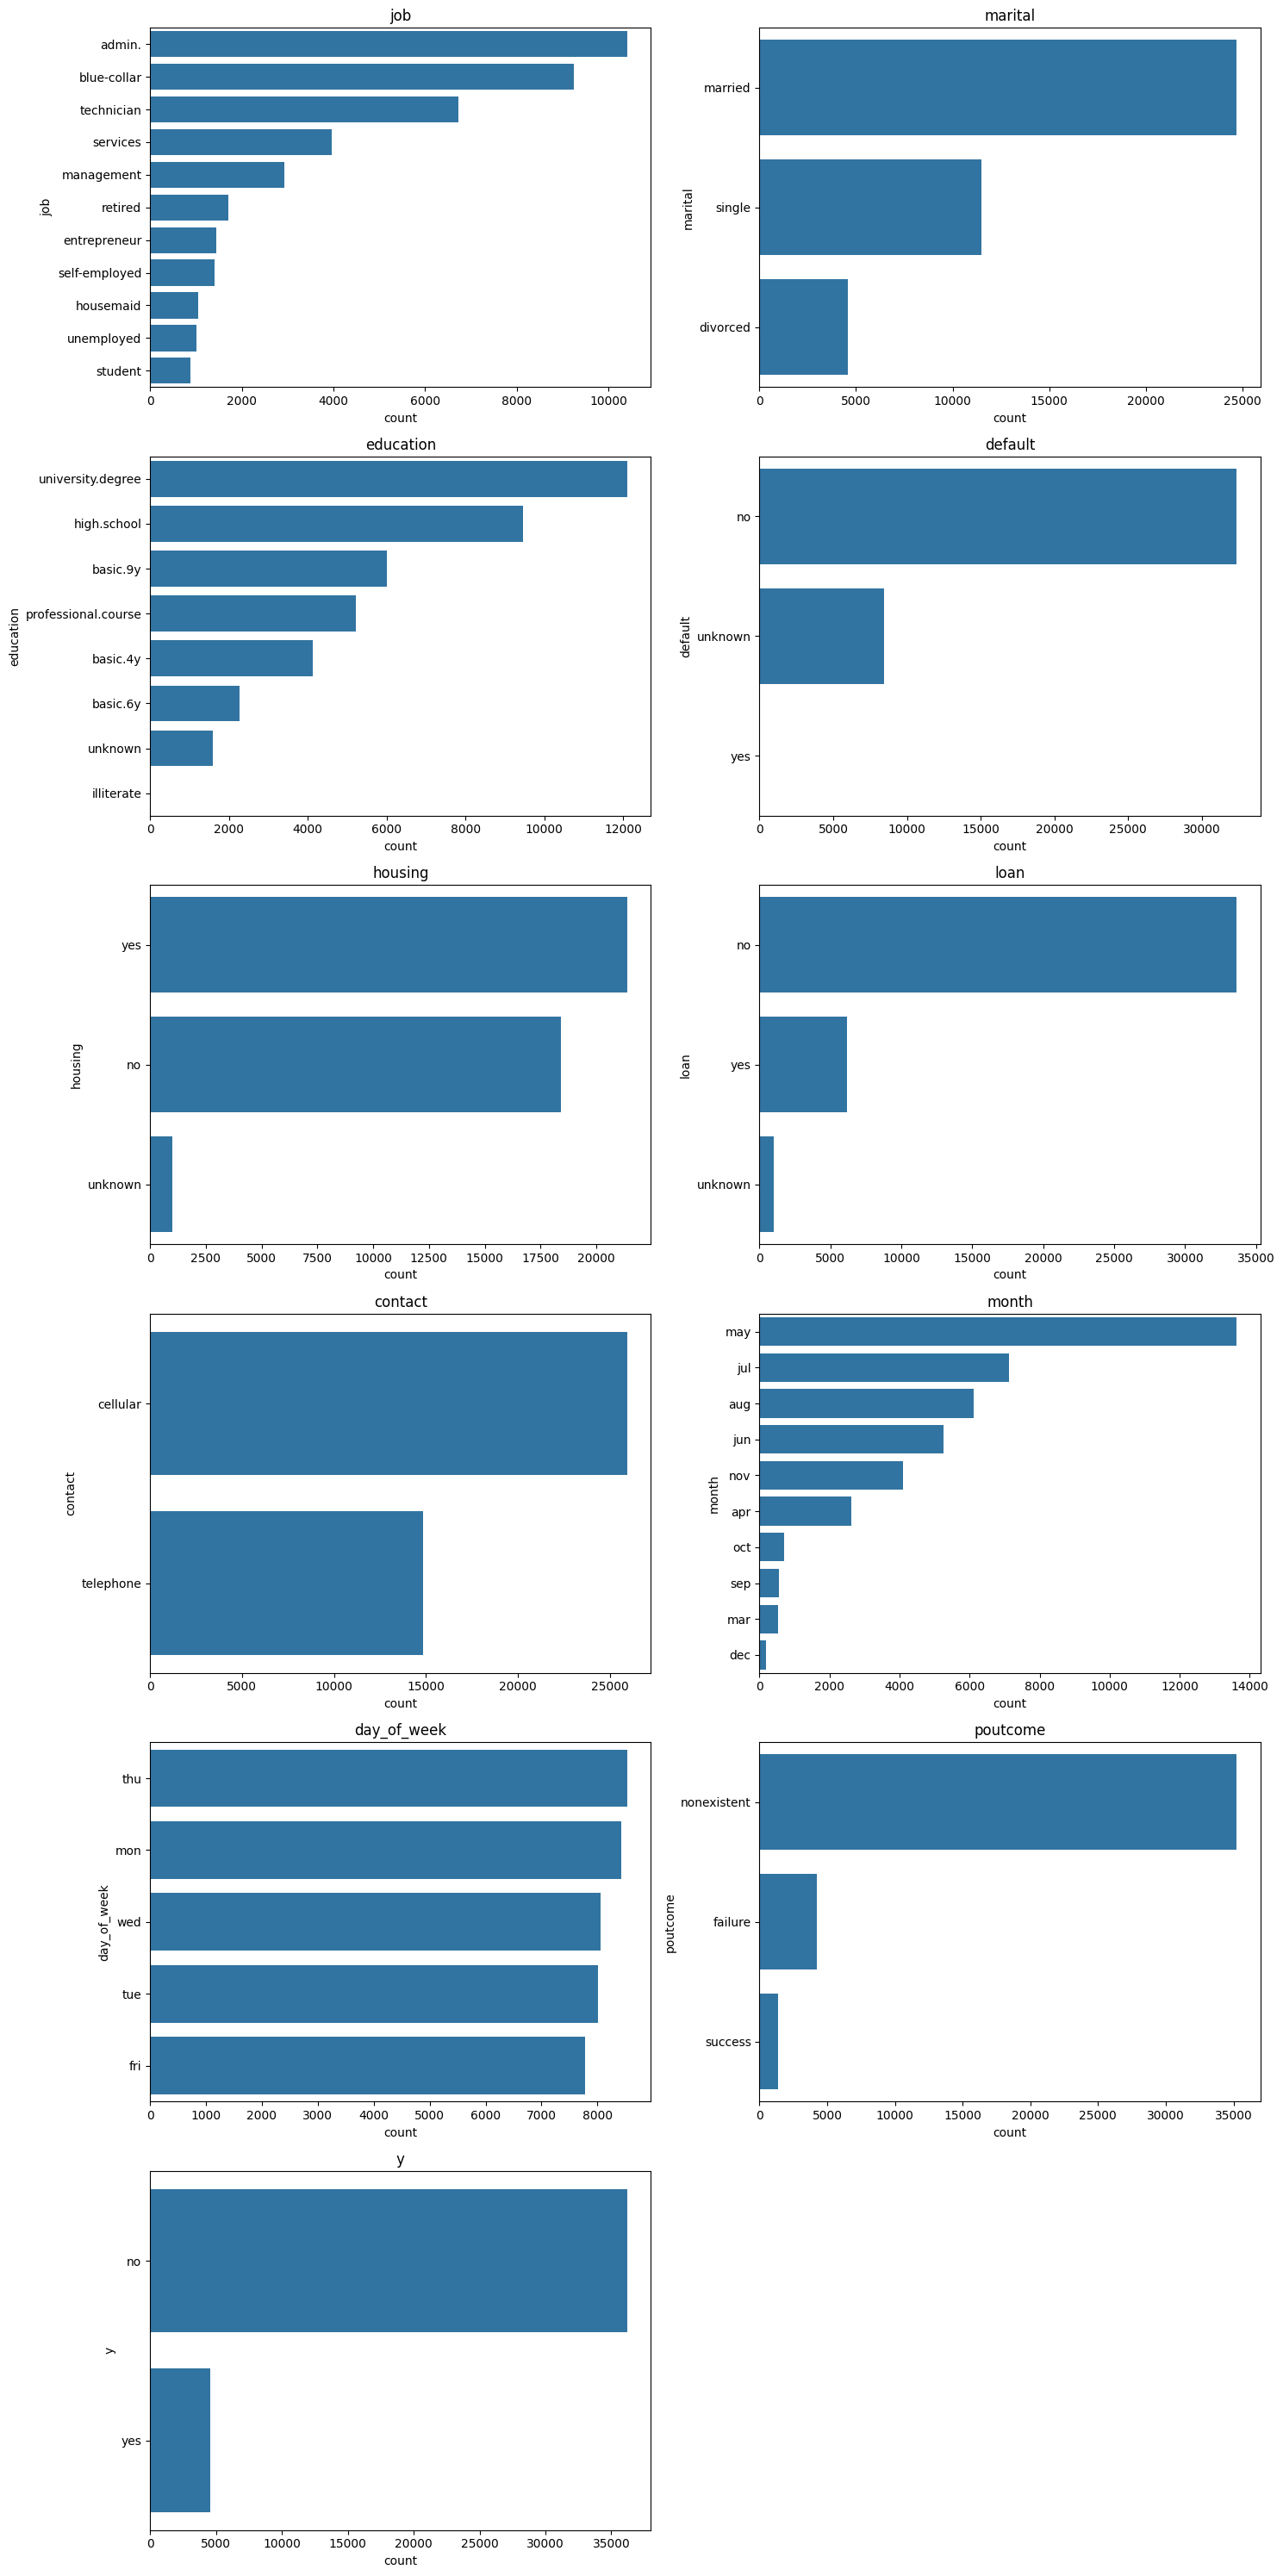

In [ ]:
# Análisis de variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns
n = len(cat_cols)
rows = math.ceil(n / 2)

plt.figure(figsize=(15, 5 * rows))

for i, column in enumerate(cat_cols, 1):
    plt.subplot(rows, 2, i)
    order = df[column].value_counts().index
    sns.countplot(data=df, y=column, order=order)
    plt.title(column)

plt.tight_layout()
plt.show()


# ANÁLISIS
###
Trabajo (job): Los 'unknown' podrían ser investigados para ver si pueden ser reasignados a categorías existentes basadas en otras características. Si esto no es posible, podemos optar por mantenerlos como están o agruparlos en una nueva categoría como 'otros'.

Estado Civil (marital): La categoría 'unknown' es bastante pequeña en comparación con las otras, por lo que podemos considerar imputar estos valores basándonos en la distribución de las otras categorías o eliminar estos registros si son pocos.

Educación (education): Con una cantidad más significativa de 'unknowns', sería prudente investigar si existe algún patrón o relación con otras variables que podrían sugerir una imputación adecuada.

Crédito en Incumplimiento (default): Dado que la mayoría de los valores están en 'no' o 'unknown', y hay muy pocos 'yes', podríamos considerar agrupar 'yes' y 'unknown' en una categoría si 'default' no es una variable clave en el análisis.

Préstamo de Vivienda (housing) y Préstamo Personal (loan): La estrategia de tratar con 'unknown' podría ser similar a la de 'default', pero también podríamos considerar la imputación basada en la moda o la mediana si son variables importantes para el modelo.

Contacto (contact): No hay valores 'unknown' aquí.

Mes (month): Algunos meses tienen una frecuencia mucho más alta que otros. Si bien no hay 'unknowns', hemos de tener en cuenta la estacionalidad y cómo esto puede afectar los resultados de tu campaña.

Día de la Semana (day_of_week): Las frecuencias parecen relativamente equilibradas a lo largo de la semana, sin valores 'unknown' para tratar.

Resultado de la Campaña Anterior (poutcome): La mayoría de los resultados son 'nonexistent', lo que sugiere que muchos clientes no fueron contactados en campañas anteriores, lo cual es consistente con otras variables.

Target (y): Aquí podemos ver claramente el desbalance de clases entre 'no' y 'yes'. Esto es algo que tendremos que abordar en la modelización, posiblemente mediante técnicas de balanceo de clases.

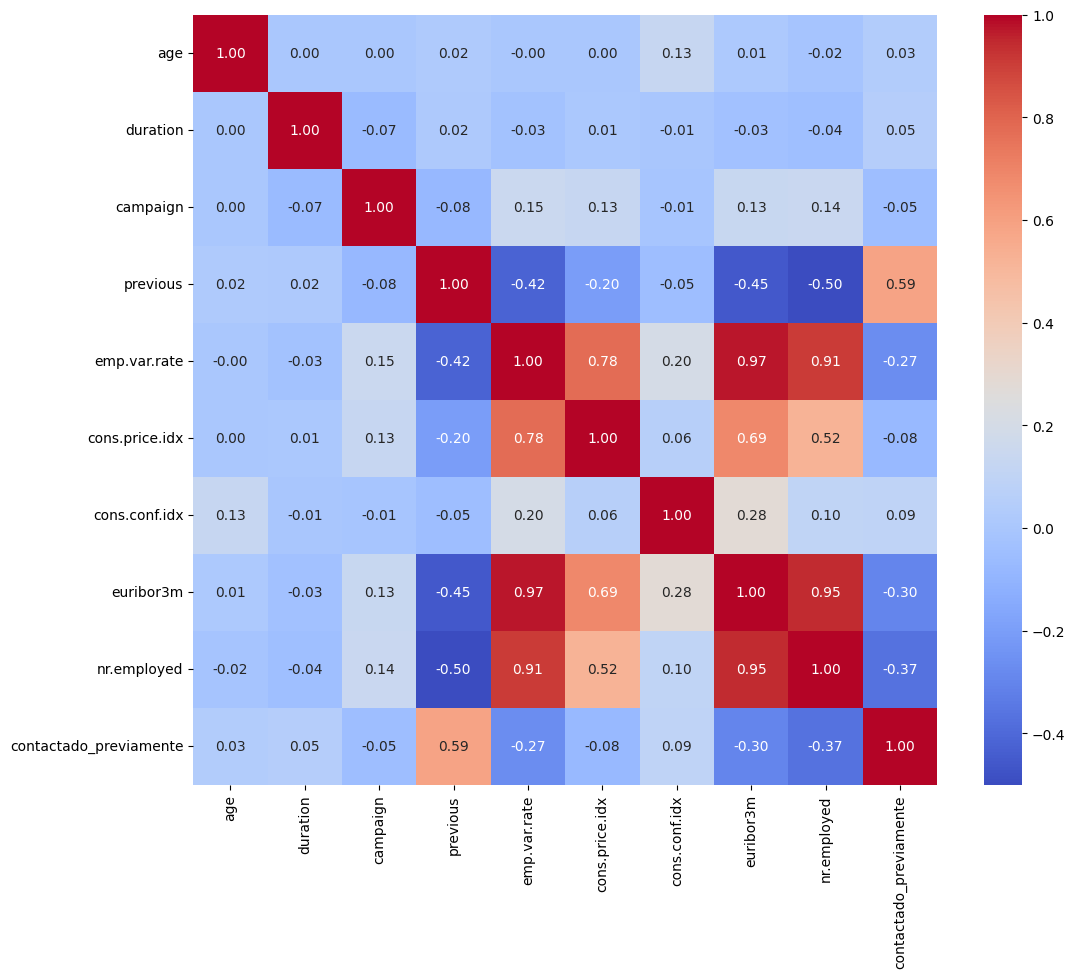

In [ ]:
# Calculando la matriz de correlación solo para variables numéricas
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


# ANÁLISIS
###
euribor3m, emp.var.rate, y nr.employed tienen altas correlaciones positivas entre sí. Esto sugiere que estas variables pueden estar influenciadas por factores económicos similares y podrían explicar aspectos similares del comportamiento del cliente.

previous y contactado_previamente también tienen una correlación positiva moderada, lo cual tiene sentido ya que si un cliente ha sido contactado anteriormente, es más probable que tenga un valor mayor en "previous".

Hay una correlación negativa moderada entre previous y emp.var.rate, así como entre previous y euribor3m, indicando que los clientes fueron contactados previamente más a menudo cuando las condiciones económicas eran diferentes.

Estas correlaciones pueden ser útiles para entender la dinámica detrás de las decisiones de los clientes y podrían influir en cómo decidimos modelar estos factores. La multicolinealidad entre algunas de estas variables podría ser problemática para ciertos modelos estadísticos, por lo que podría ser necesario considerar la eliminación o combinación de variables correlacionadas para evitar distorsiones en los resultados del modelo.

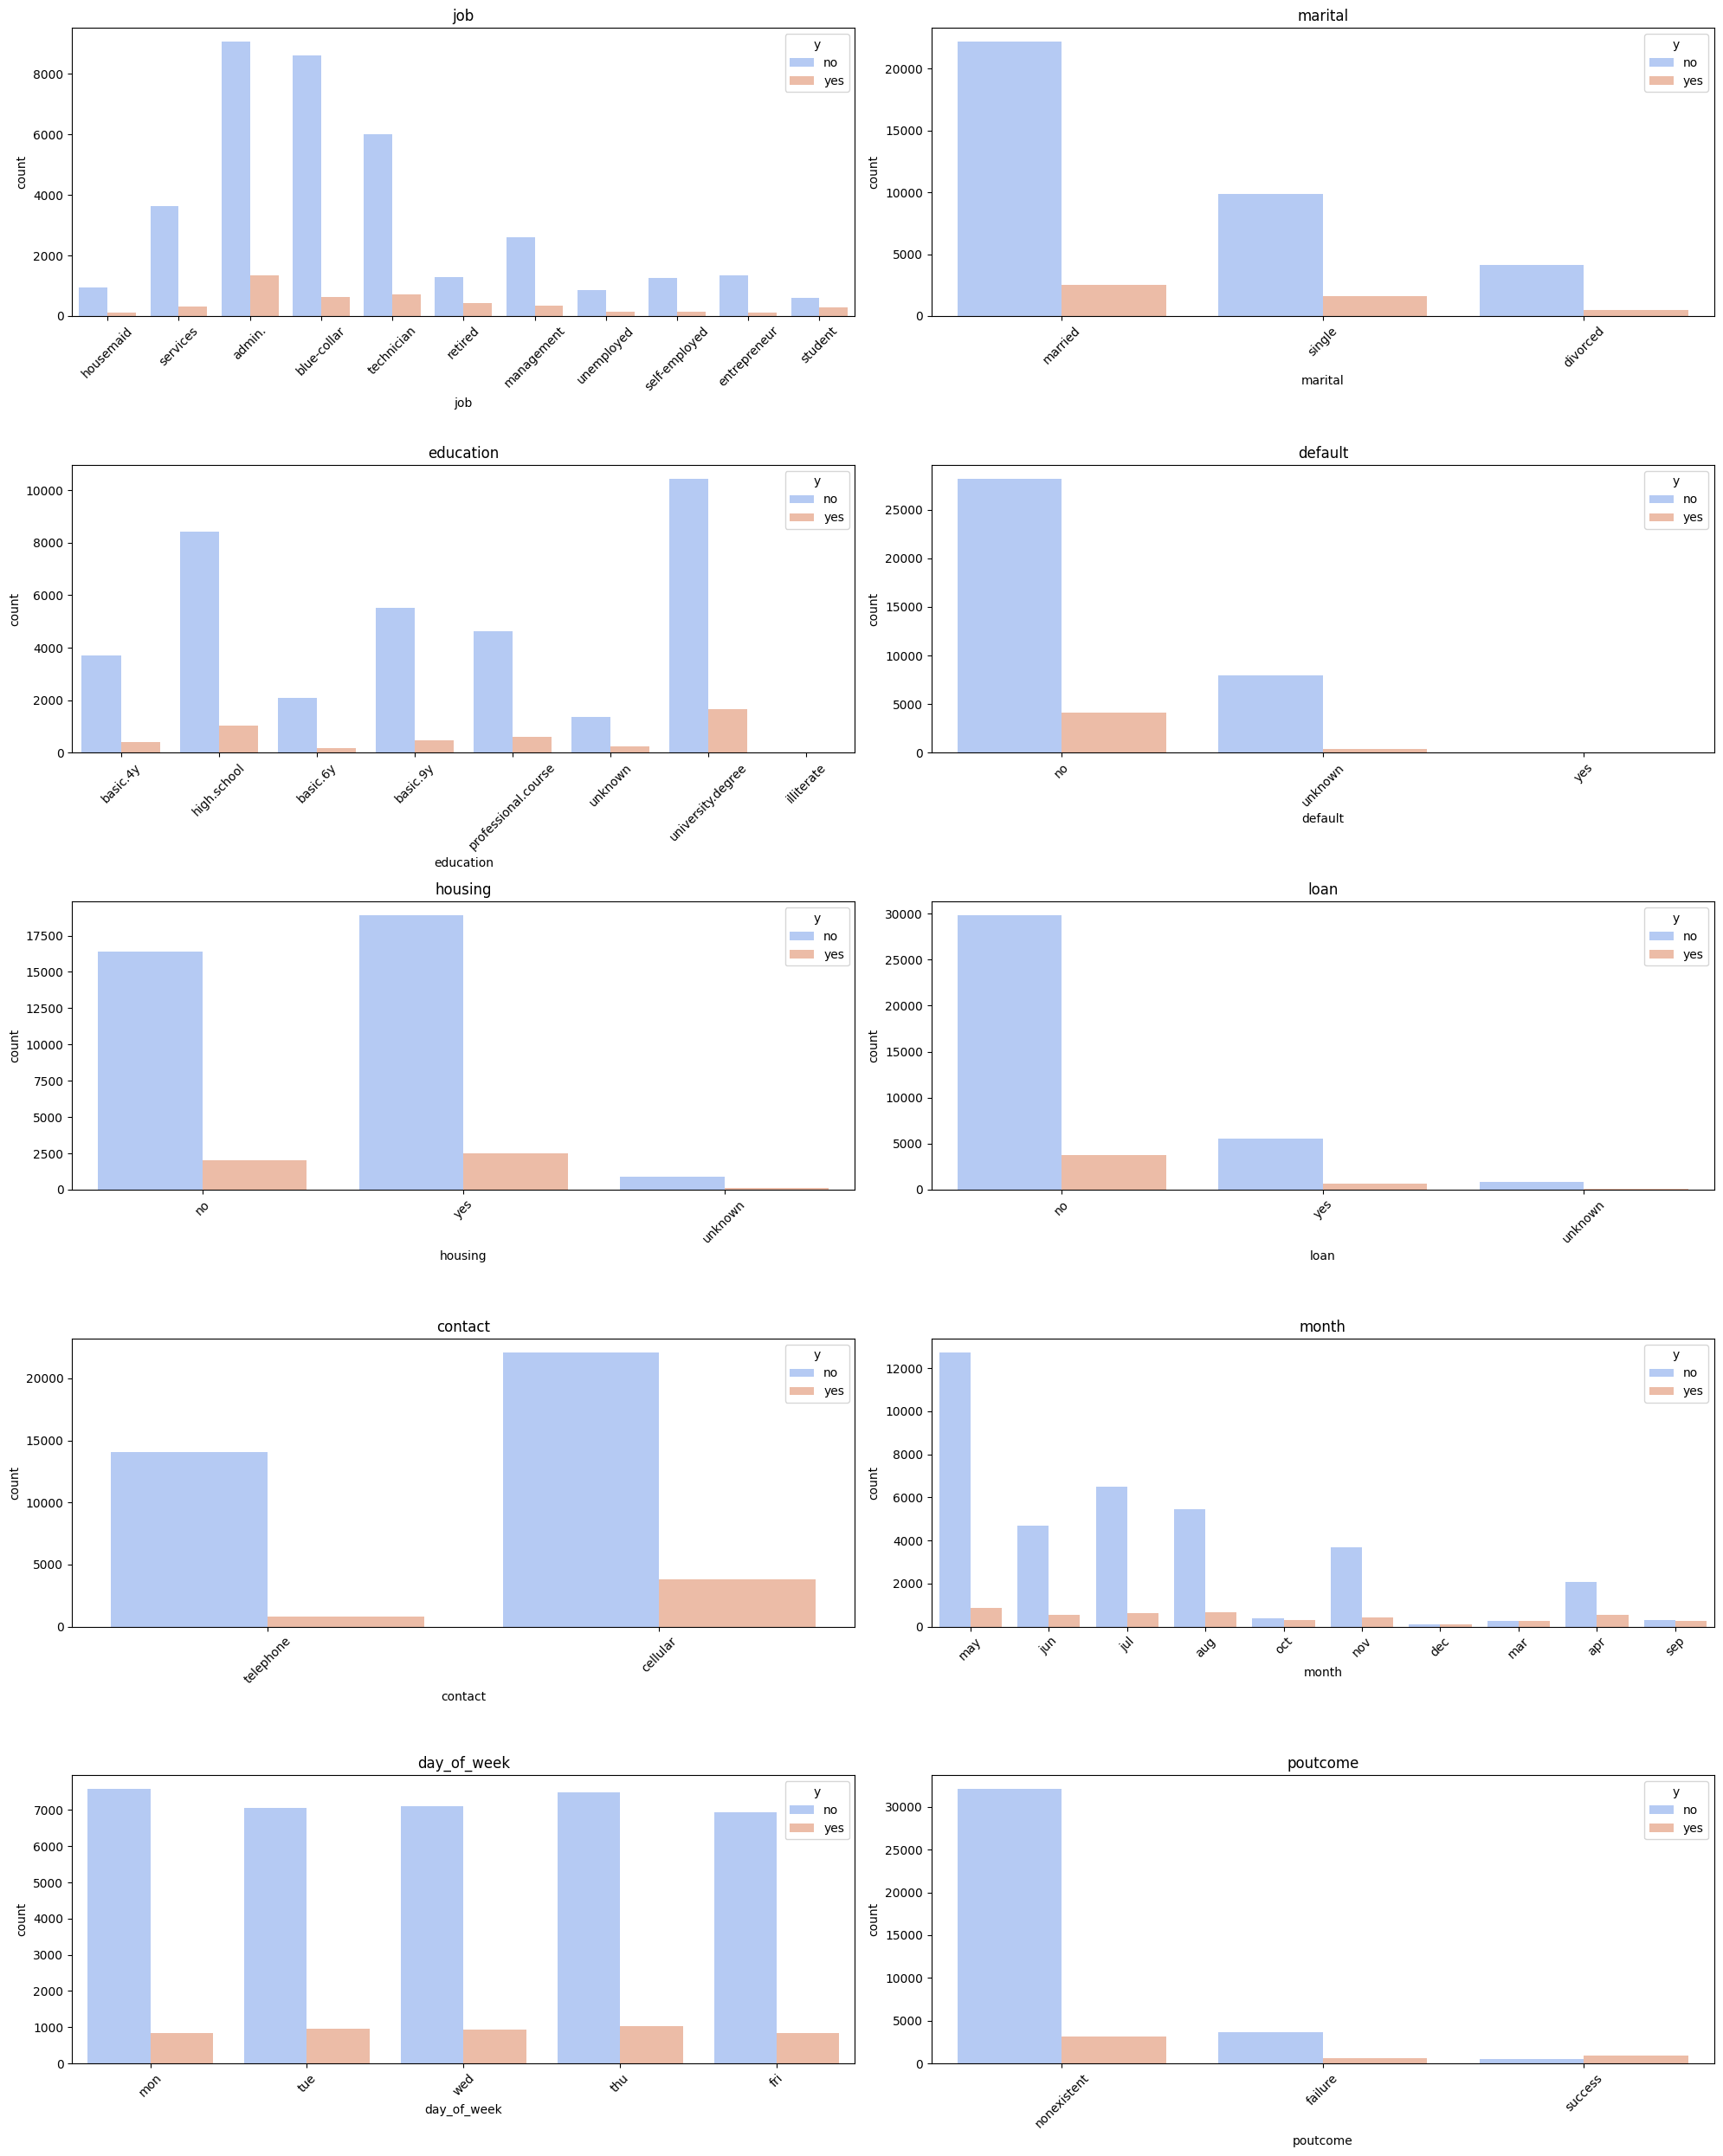

In [ ]:
# Relaciones entre variables categóricas y la variable objetivo

# Selecciona solo las columnas categóricas, excluyendo 'y'
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols[cat_cols != 'y']  # Excluye la variable objetivo 'y'

# Define el número de filas/columnas para los subplots
n_cols = 2  # Elige cuántas columnas quieres en tu gráfica
n_rows = math.ceil(len(cat_cols) / n_cols)

# Configura el tamaño de la figura
plt.figure(figsize=(20, 5 * n_rows))

for i, column in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=column, hue='y', palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title(column)
    plt.tight_layout()  # Ajusta la disposición de los plots

plt.show()

# ANÁLISIS
###
Trabajo (job): Ciertas profesiones, como la administración, parecen tener una proporción más alta de suscripciones. Sería interesante analizar más a fondo estas categorías para entender si factores como el ingreso o la estabilidad laboral influyen en su decisión.

Estado Civil (marital): Los solteros parecen tener una tasa de suscripción más alta en comparación con los casados o divorciados, lo que podría sugerir que tienen más flexibilidad o interés en productos de inversión a largo plazo.

Educación (education): Los clientes con un grado universitario tienden a suscribirse más que otros niveles educativos. Esto podría reflejar un mejor entendimiento de los productos financieros o mayor capacidad económica.

Crédito en Incumplimiento (default): Los clientes que no tienen un crédito en incumplimiento tienden a suscribirse más, lo cual es esperado, ya que tener un buen historial crediticio podría correlacionarse con la estabilidad financiera y la capacidad de invertir en depósitos a largo plazo.

Préstamo de Vivienda (housing) y Préstamo Personal (loan): No parecen haber diferencias significativas en la suscripción basadas en estas variables, aunque los clientes sin préstamos personales tienen ligeramente más suscripciones. Podría valer la pena examinar si la ausencia de deudas influye en la decisión de invertir en depósitos a largo plazo.

Contacto (contact): Los métodos de contacto podrían influir en la tasa de suscripción, con un contacto celular pareciendo ser más efectivo que un contacto telefónico.

Mes (month): Hay variaciones en las tasas de suscripción según el mes, lo que podría indicar una estacionalidad en la decisión de inversión o en la efectividad de la campaña.

Día de la Semana (day_of_week): No parece haber una variación significativa en la suscripción basada en el día de la semana.

Resultado de la Campaña Anterior (poutcome): Los clientes con un resultado exitoso en la campaña anterior tienen una tasa de suscripción mucho más alta, lo que indica que la experiencia positiva previa puede ser un predictor importante de futuras suscripciones.

Suscripción (y): Hay un claro desbalance entre los clientes que no suscribieron y los que sí, lo cual es un punto clave para considerar en la modelación predictiva.

<Axes: >

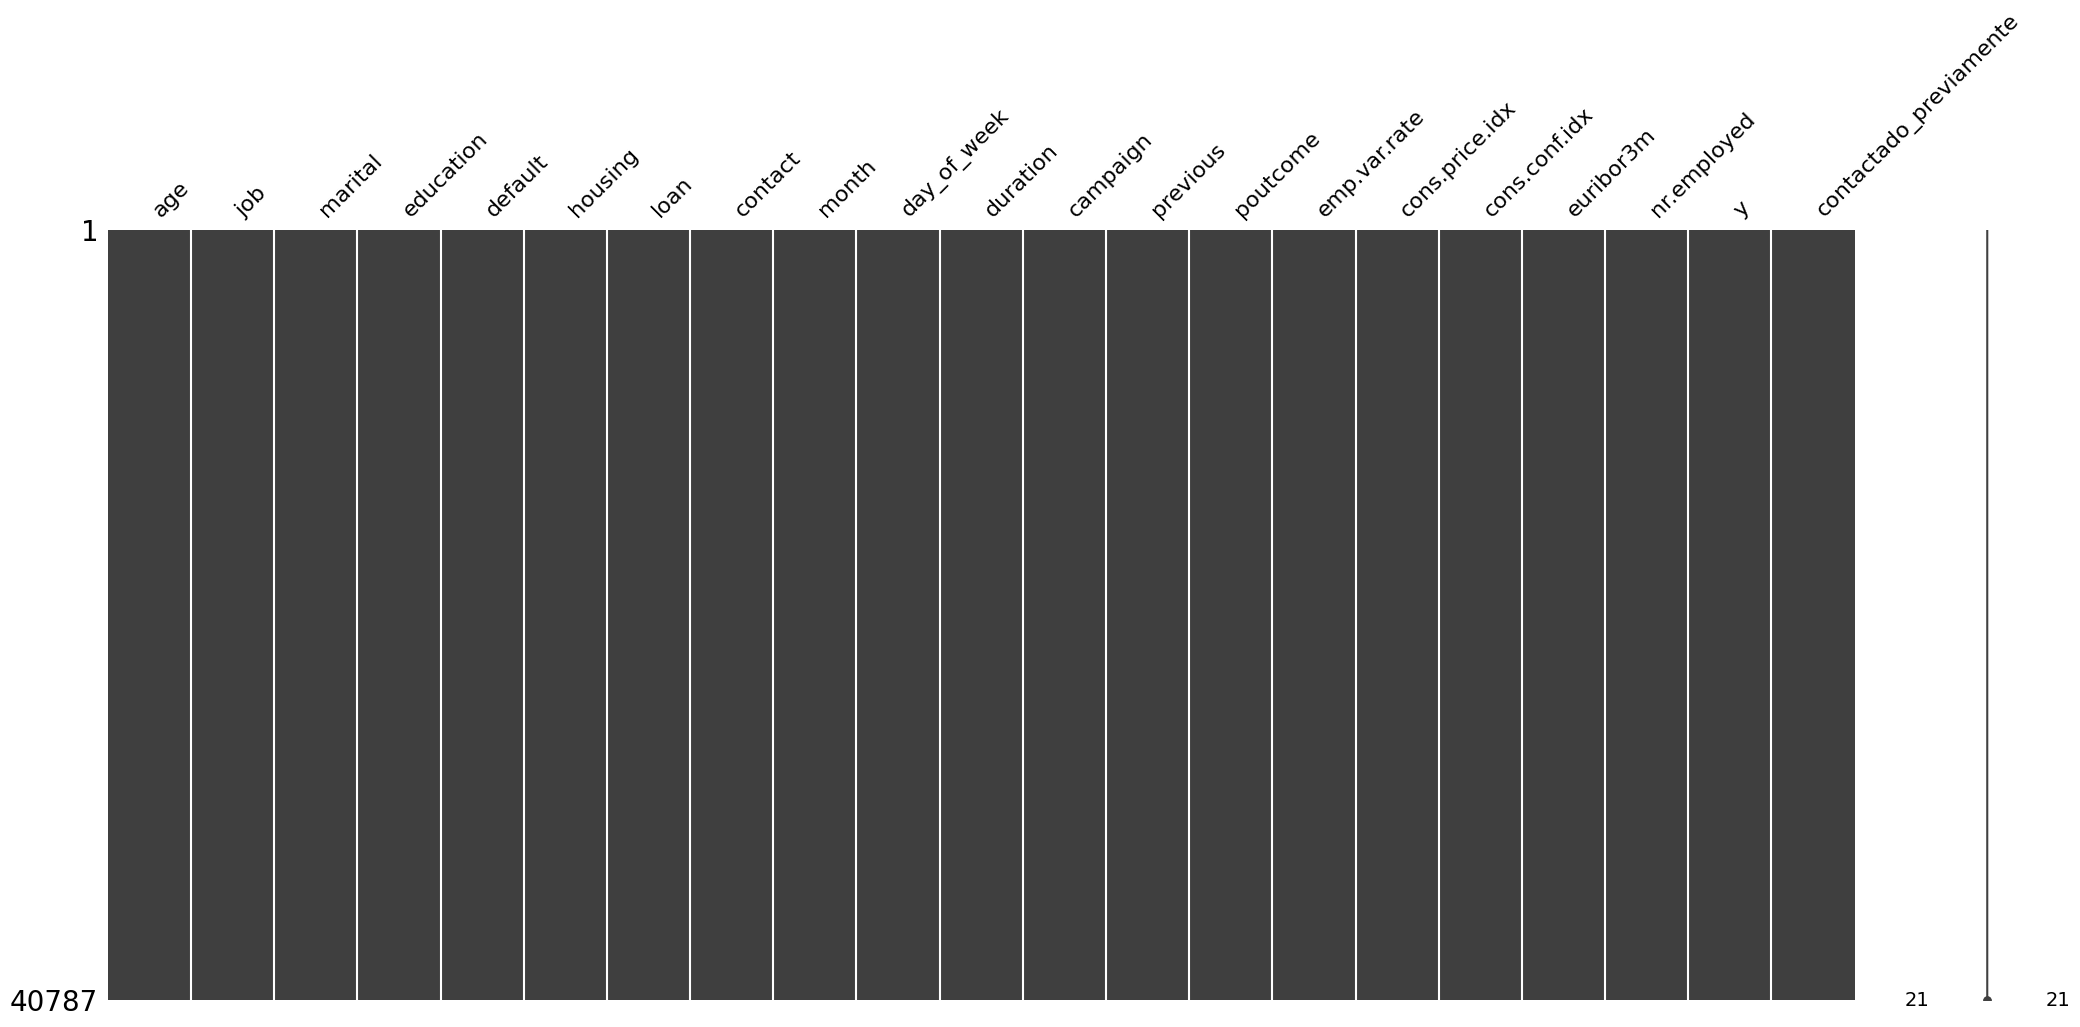

In [ ]:
msno.matrix(df)

In [ ]:
# One-Hot Encoding para variables nominales
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

In [ ]:
# Escala solo las variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'contactado_previamente', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [ ]:
# Seleccionar solo las columnas numéricas para el cálculo de VIF
variables_numericas = df[['age', 'duration', 'campaign', 'previous', 
                          'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                          'euribor3m', 'nr.employed']]

# Agregar una constante al dataframe para el cálculo de VIF
X = add_constant(variables_numericas)

# Crear un nuevo dataframe para los resultados de VIF
VIF_df = pd.DataFrame()
VIF_df["variable"] = X.columns

# Calcular el VIF para cada variable
VIF_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados
print(VIF_df)

         variable        VIF
0           const   1.000000
1             age   1.018506
2        duration   1.008071
3        campaign   1.037977
4        previous   1.347434
5    emp.var.rate  33.089295
6  cons.price.idx   6.321078
7   cons.conf.idx   2.614199
8       euribor3m  64.285002
9     nr.employed  31.639365


# ANÁLISIS
### Como hemos visto en la matriz de correlación, hay 3 variables fuertemente correlacionadas. Eliminamos la de mayor VIF y continuamos analizando para ver si debemos eliminar también otra de las 3 variables.

In [ ]:
df = df.drop(['euribor3m'], axis=1)

In [ ]:
# VALIDACIÓN CRUZADA para ver si eliminamos también emp.var.rate
X = df.select_dtypes(include=['int64', 'float64'])  

# Instanciar el codificador de etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['y'])

# Crear una instancia de un modelo. Aquí usamos LogisticRegression como ejemplo.
model = make_pipeline(StandardScaler(), LogisticRegression())

# Realizar la validación cruzada
# cv es el número de pliegues, ajusta a tus necesidades (5 es comúnmente utilizado)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  

# Imprimir el promedio de los puntajes de validación cruzada y la desviación estándar
print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Accuracy: 0.8477188708011261 (+/- 0.167792027365635)


In [ ]:
df = df.drop(['emp.var.rate'], axis=1)

In [ ]:
# VALIDACIÓN CRUZADA para ver si eliminamos también emp.var.rate
X = df.select_dtypes(include=['int64', 'float64'])  

# Instanciar el codificador de etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['y'])

# Crear una instancia de un modelo. Aquí usamos LogisticRegression como ejemplo.
model = make_pipeline(StandardScaler(), LogisticRegression())

# Realizar la validación cruzada
# cv es el número de pliegues, ajusta a tus necesidades (5 es comúnmente utilizado)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  

# Imprimir el promedio de los puntajes de validación cruzada y la desviación estándar
print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Accuracy: 0.8528676963909099 (+/- 0.15643728668157286)


In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")

default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
y: ['no' 'yes']


In [ ]:
# Convertir 'yes'/'no' a 1/0 y 'unknown' a None para default, housing, y loan
df['default'] = df['default'].map({'yes': 1, 'no': 0, 'unknown': None})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0, 'unknown': None})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0, 'unknown': None})

# Convertir yes/no a 1/0 para y
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
# Aplicar KNNImputer
# n_neighbors=5 es un buen punto de partida, pero ajusta según necesites
imputer = KNNImputer(n_neighbors=5, weights="uniform", add_indicator=False)

# Imputar los valores faltantes
imputed_data = imputer.fit_transform(df)

# Convertir el array imputado de vuelta a DataFrame, asegurando que mantenemos los nombres de las columnas
df = pd.DataFrame(imputed_data, columns=df.columns)

In [ ]:
df.head

<bound method NDFrame.head of             age  default  housing  loan  duration  campaign  previous  \
0      1.540198      0.0      0.0   0.0  0.010299 -0.565778 -0.349341   
1      1.636333      0.0      0.0   0.0 -0.421689 -0.565778 -0.349341   
2     -0.286369      0.0      1.0   0.0 -0.124697 -0.565778 -0.349341   
3      0.002036      0.0      0.0   0.0 -0.413975 -0.565778 -0.349341   
4      1.540198      0.0      0.0   1.0  0.187723 -0.565778 -0.349341   
...         ...      ...      ...   ...       ...       ...       ...   
40782  3.174494      0.0      1.0   0.0  0.291863 -0.565778 -0.349341   
40783  0.578847      0.0      0.0   0.0  0.480857 -0.565778 -0.349341   
40784  1.540198      0.0      1.0   0.0 -0.267408 -0.204515 -0.349341   
40785  0.386577      0.0      0.0   0.0  0.708423 -0.565778 -0.349341   
40786  3.270629      0.0      1.0   0.0 -0.074556  0.156748  1.671445   

       cons.price.idx  cons.conf.idx  nr.employed  ...  month_may  month_nov  \
0            

In [ ]:
# Preparar los datos
X = df.drop(['y'], axis=1)
y = label_encoder.fit_transform(df['y'])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística con parámetros por defecto
logistic_model = LogisticRegression()

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7230
           1       0.66      0.43      0.52       928

    accuracy                           0.91      8158
   macro avg       0.80      0.70      0.73      8158
weighted avg       0.90      0.91      0.90      8158

[[7029  201]
 [ 533  395]]


In [ ]:
# Definir el espacio de parámetros para Grid Search
param_grid = {
    'penalty': ['l1', 'l2'],  # l1 lasso y l2 ridge
    'C': [0.1, 1, 10],        # C es el inverso de la fuerza de regularización
    'solver': ['liblinear']   # 'liblinear' es un buen solver para conjuntos de datos pequeños y para regularización l1
}

# Crear el GridSearchCV con la regresión logística
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Best parameters: {grid_search.best_params_}")

# Evaluar el mejor modelo encontrado con GridSearchCV en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Evaluar el modelo optimizado
print(classification_report(y_test, y_pred_optimized))
print(confusion_matrix(y_test, y_pred_optimized))

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7230
           1       0.66      0.43      0.52       928

    accuracy                           0.91      8158
   macro avg       0.80      0.70      0.74      8158
weighted avg       0.90      0.91      0.90      8158

[[7028  202]
 [ 529  399]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'logisticregression__C': uniform(0.01, 100),  # Distribución uniforme entre 0.01 y 100
    'logisticregression__penalty': ['l1', 'l2'],      # Tipo de regularización
    'logisticregression__solver': ['liblinear']       # Solver compatible con regularización l1
}

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions, n_iter=100, cv=5, scoring='f1_macro', random_state=42)

# Entrenar el RandomizedSearchCV
random_search.fit(X_train, y_train)

# Ver los mejores parámetros
print("Best parameters:", random_search.best_params_)

Best parameters: {'logisticregression__C': 43.20450186421157, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


In [ ]:
# Configurar el modelo con los mejores hiperparámetros
best_model = make_pipeline(StandardScaler(), LogisticRegression(
    C=43.20450186421157, penalty='l1', solver='liblinear'))

# Entrenar el modelo
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_best = best_model.predict(X_test)

# Evaluar el modelo
print("Classification Report (Optimized Model):")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Classification Report (Optimized Model):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7230
           1       0.66      0.43      0.52       928

    accuracy                           0.91      8158
   macro avg       0.80      0.70      0.74      8158
weighted avg       0.90      0.91      0.90      8158

Confusion Matrix:
[[7028  202]
 [ 529  399]]


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Crear el modelo de regresión logística dentro de un pipeline que también incluye SMOTE y el escalado
model_smote = make_pipeline_imb(StandardScaler(), smote, LogisticRegression(C=43.20450186421157, penalty='l1', solver='liblinear', max_iter=1000))

# Entrenar el modelo
model_smote.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_smote = model_smote.predict(X_test)

# Evaluar el modelo
print("Classification Report (Model with SMOTE):")
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))

Classification Report (Model with SMOTE):
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7230
           1       0.45      0.87      0.59       928

    accuracy                           0.86      8158
   macro avg       0.71      0.86      0.75      8158
weighted avg       0.92      0.86      0.88      8158

Confusion Matrix:
[[6230 1000]
 [ 123  805]]


In [ ]:
# Definir el espacio de parámetros para Grid Search
param_grid = {
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],  # Incluir elasticnet
    'logisticregression__C': np.logspace(-4, 4, 20),            # Uso de logspace para un rango más amplio y distribuido logarítmicamente
    'logisticregression__solver': ['liblinear', 'saga'],        # Incluir 'saga'
    'logisticregression__tol': [1e-4, 1e-3, 1e-2],              # Ajustar la tolerancia
    'logisticregression__l1_ratio': np.linspace(0, 1, 10)       # Solo es necesario si eliges 'elasticnet' como penalización
}

# Crear el GridSearchCV con la regresión logística
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Best parameters: {grid_search.best_params_}")

# Evaluar el mejor modelo encontrado con GridSearchCV en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Evaluar el modelo optimizado
print(classification_report(y_test, y_pred_optimized))
print(confusion_matrix(y_test, y_pred_optimized))

ValueError: Invalid parameter 'logisticregression' for estimator LogisticRegression(). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].